# Problem Statement :
---
The goal is to understand the relationship between house features and how these
variables affect the house price.

Using more than one model, predict the price of the house using the given dataset. Please compare the
accuracy of the models along with the drawbacks of each technique's assumptions before recommending
the final prediction model.


### Importing Libraries

In [1]:
# for data modelling
import pandas as pd
import numpy as np
# for splitting dataset
from sklearn.model_selection import train_test_split 

In [2]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# for metrics
from sklearn import metrics

In [4]:
import warnings 
warnings.filterwarnings(action='ignore')

In [5]:
# Linear Regression
from sklearn.linear_model import LinearRegression

In [6]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
# For Lasso
from sklearn.linear_model import Lasso

In [8]:
# For XGB Regressor
from xgboost import XGBRegressor
import xgboost as xgb

In [9]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

### Loading The Dataset

In [10]:
data = pd.read_excel('/content/drive/MyDrive/Shack Labs Assignment/Assignment-1/DS - Assignment Part 1 data set.xlsx')

In [11]:
print("Shape of Dataset ", data.shape)
print("Columns of Dataset ",data.columns)
data.info()

Shape of Dataset  (414, 9)
Columns of Dataset  Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms  

In [12]:
# description of overall dataset
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [13]:
# overall null values in dataset
data.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [14]:
# datatypes in of features in dataset
data.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [15]:
# Let's see Transaction Data ? Why it's datatype is Float ?
data['Transaction date'].head()

0    2012.916667
1    2012.916667
2    2013.583333
3    2013.500000
4    2012.833333
Name: Transaction date, dtype: float64

In [16]:
# Let's see our Target Variable - House price of unit area
data["House price of unit area"].head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

### Visualizing The Dataset

Let's Start with target Variable

In [17]:
target_data = data["House price of unit area"]

In [18]:
def univariate_analysis(data , title):
  """
  This function takes an univariate variable title along with data_set and gives analysis of variable using boxplot and histplot 
  """
  fig , ax = plt.subplots(1,2,figsize=(7,5))

  ax1 = ax[0]
  sns.histplot(data=data[title],kde=True,ax=ax1)
  ax1.set_title(title)

  ax2 = ax[1]
  sns.boxplot(data=data[title],ax=ax2)
  ax2.set_title(title)

  plt.tight_layout()
  plt.show()

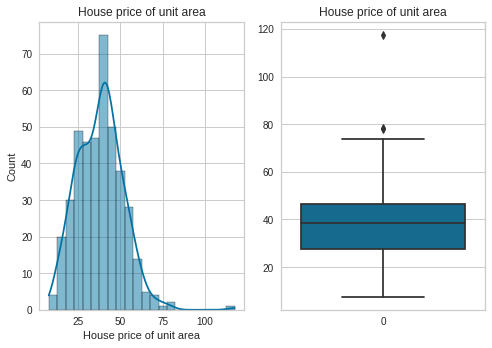

In [19]:
univariate_analysis(data,target_data.name)

Now Let's look into all the features and relation of these features with target variable 

In [20]:
def compare_target(row , col , data, Data):
  fig, ax = plt.subplots(row,col,figsize=(18,12))
  columns = data.columns 
  k = 0 
  for i in range(row):
    for j in range(col):
      axs = ax[i,j]
      sns.lineplot(data=Data, x=columns[k], y="House price of unit area", ax=axs)
      axs.set_xlabel(columns[k])
      axs.set_ylabel('House Price of unit area')
      axs.set_title('House price vs '+columns[k])
      k+=1
  plt.tight_layout()
  plt.show()

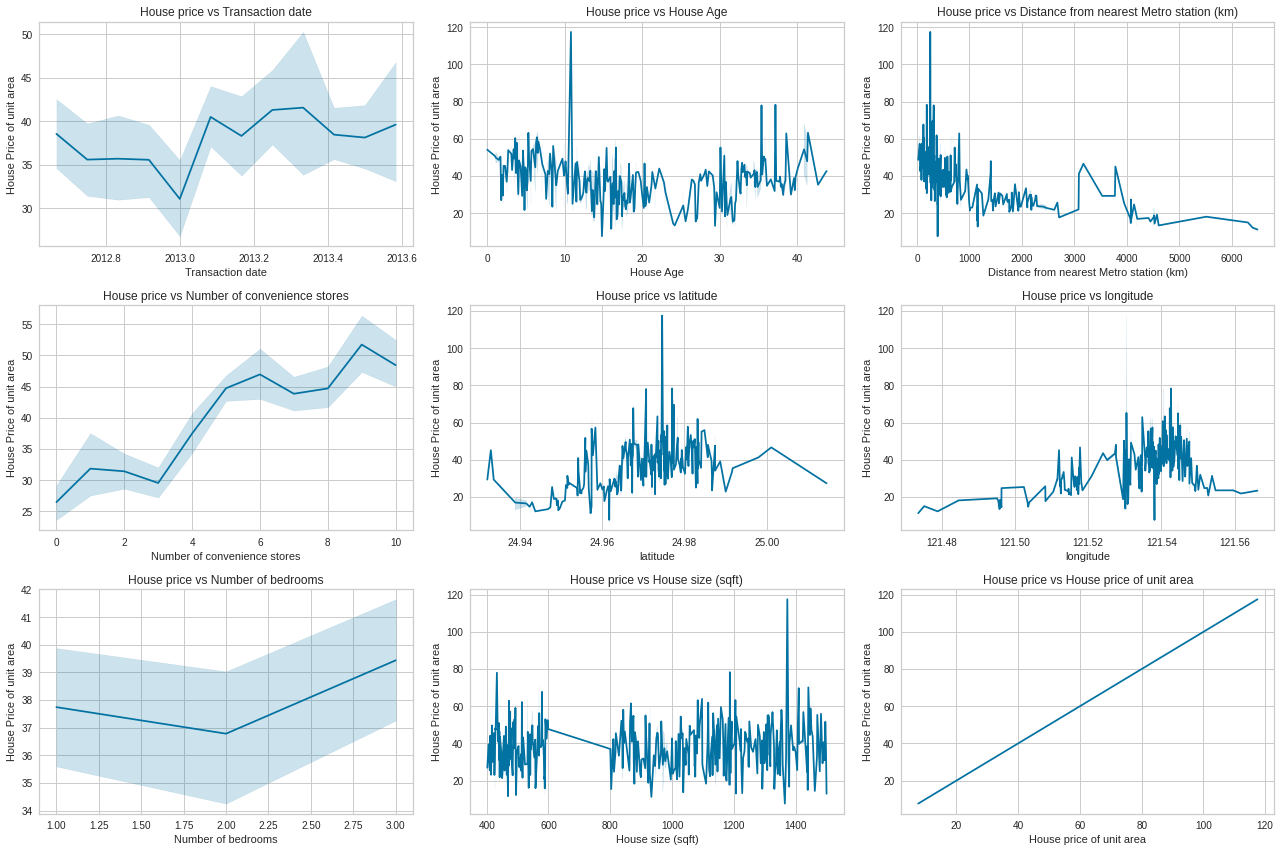

In [21]:
compare_target(3 ,3 , data , data)

In [22]:
def check_columns(row , col , Data ):
  fig, ax = plt.subplots(row,col,figsize=(18,12))
  columns = Data.columns 
  k = 0 
  for i in range(row):
    for j in range(col):
      axs = ax[i,j]
      sns.boxplot(data=Data[columns[k]],ax=axs)
      axs.set_title(columns[k])
      k+=1
  plt.tight_layout()
  plt.show()

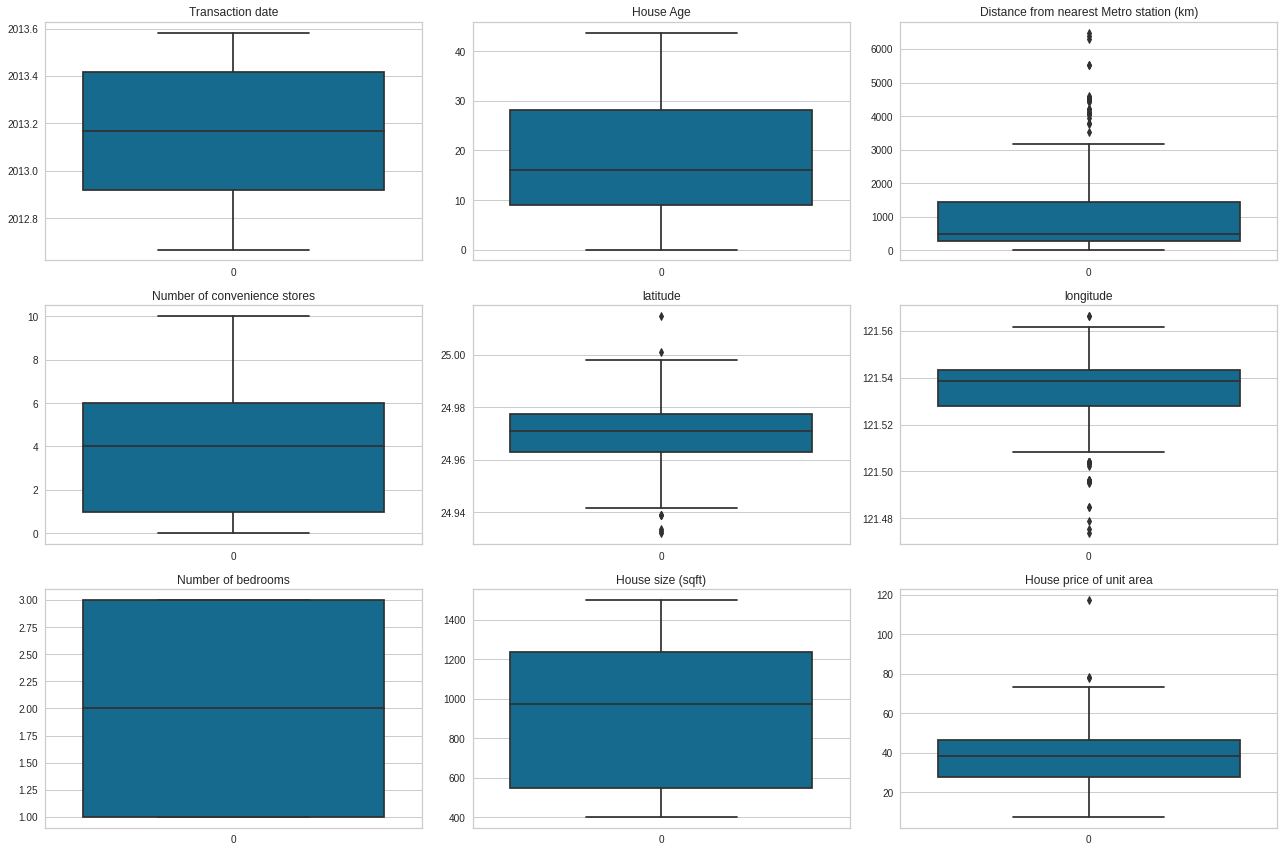

In [23]:
check_columns(3 ,3 , data)

In [24]:
def check_density(row , col , Data ):
  fig, ax = plt.subplots(row,col,figsize=(18,12))
  columns = Data.columns 
  k = 0 
  for i in range(row):
    for j in range(col):
      axs = ax[i,j]
      sns.histplot(data=Data[columns[k]],kde=True,ax=axs)
      axs.set_title(columns[k])
      k+=1
  plt.tight_layout()

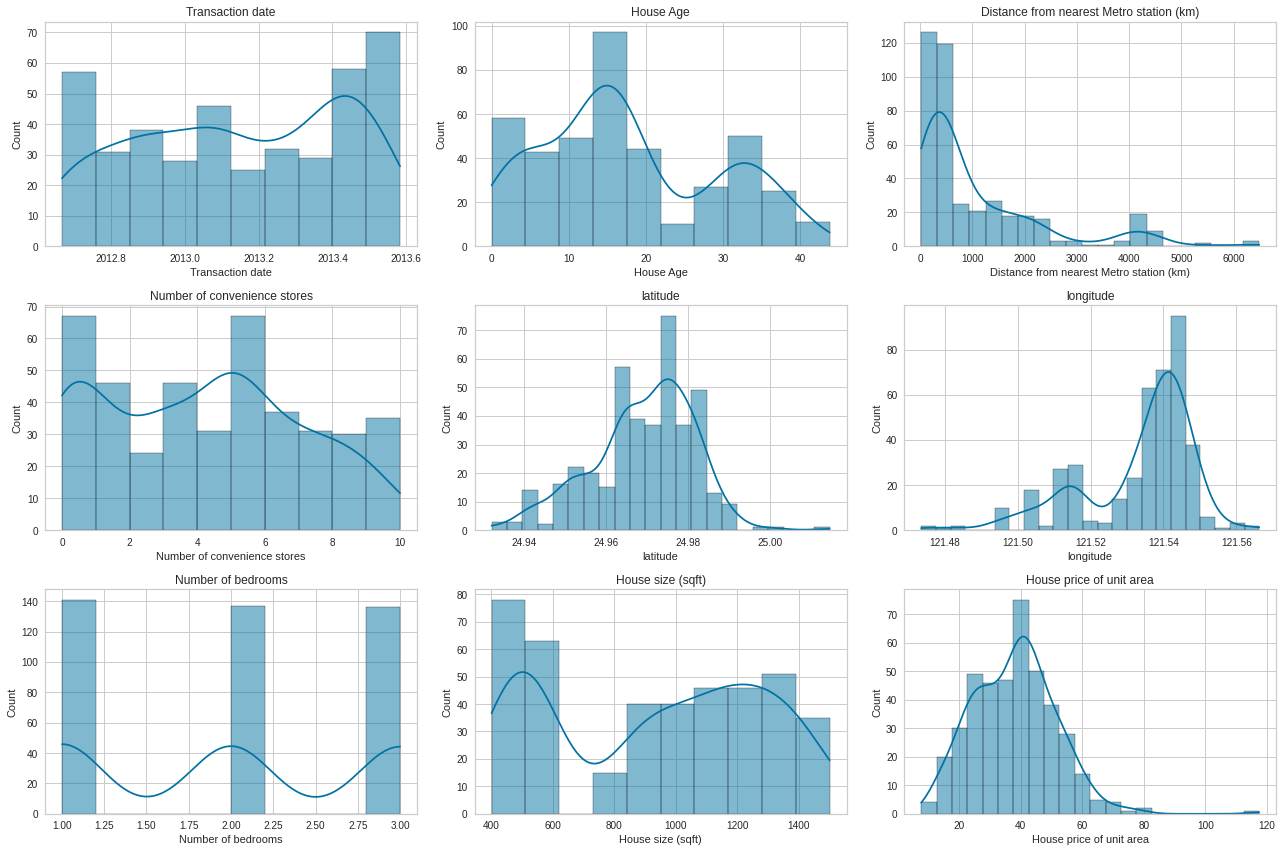

In [25]:
check_density(3,3,data)

Correlation Matrix

In [26]:
def correlation_heatmap(data):
    _, ax = plt.subplots(figsize = (10, 10))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(data.corr(), annot=True, cmap = colormap)

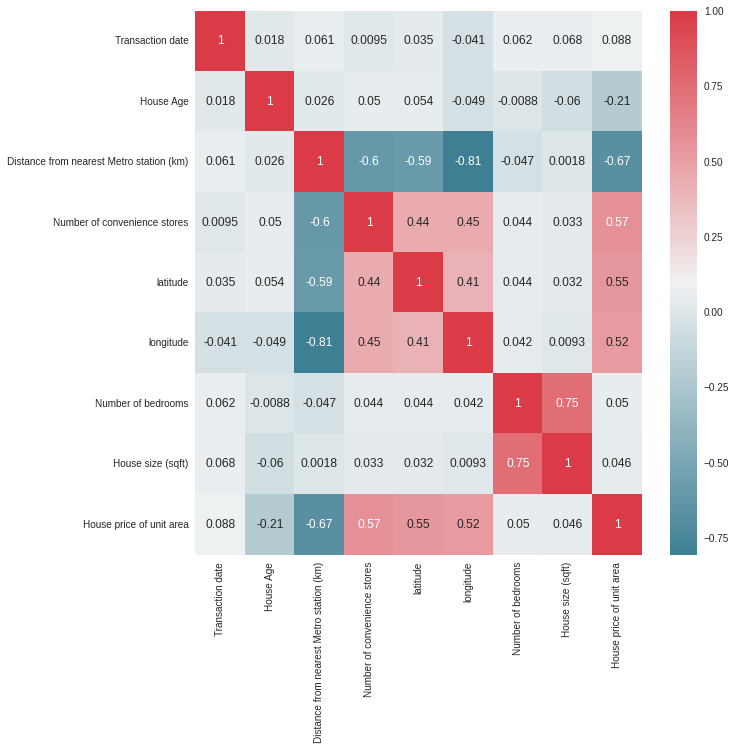

In [27]:
correlation_heatmap(data)

**Insights**

1.   Number of Convenience Stores , latitude and longitude are positively correlated with House price of unit area whereas distance from metro station and age of House negatively correlated 
2.   Latitude , Longitude and Nearest metro station has some outliers , we may have to deal with until and uless they have they don't have some underlying relation with House price of Unit area 
3.   All the features density seems to be good .

Now let's work with outliers and understand them  

In [28]:
data[data["House price of unit area"]>80]
# This definately needs to to removed 

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
270,2013.333333,10.8,252.5822,1,24.9746,121.53046,2,1373,117.5


In [29]:
data[data['Distance from nearest Metro station (km)']>3000].head()
# This looks good because House price of that area seems to be less with simillar latitude and longitude and less convenience stores , less bedrooms 
# Somewhat lookslike houses far from cities

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
8,2013.5,31.7,5512.038,1,24.95095,121.48458,1,588,18.8
30,2013.5,25.9,4519.690,0,24.94826,121.49587,2,1024,22.1
35,2013.5,13.9,4079.418,0,25.01459,121.51816,2,1249,27.3
40,2013.0,13.6,4082.015,0,24.94155,121.50381,1,558,15.9
41,2013.5,16.8,4066.587,0,24.94297,121.50342,2,1333,18.2


In [30]:
data[data['longitude'] < 121.50]
# This also looks good because simillarity in House price of unit area , latitude , longitude ,and Distance from nearest metro station

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
8,2013.500000,31.7,5512.038,1,24.95095,121.48458,1,588,18.8
30,2013.500000,25.9,4519.690,0,24.94826,121.49587,2,1024,22.1
48,2013.416667,24.2,4605.749,0,24.94684,121.49578,1,470,13.4
49,2012.666667,29.4,4510.359,1,24.94925,121.49542,2,1227,13.2
58,2013.500000,30.3,4510.359,1,24.94925,121.49542,2,1167,22.6
116,2013.000000,30.9,6396.283,1,24.94375,121.47883,1,495,12.2
170,2013.333333,24.0,4527.687,0,24.94741,121.49628,2,1462,14.4
176,2012.833333,13.9,4573.779,0,24.94867,121.49507,3,1206,19.2
180,2012.666667,26.9,4449.270,0,24.94898,121.49621,2,1331,15.5
232,2012.916667,27.1,4412.765,1,24.95032,121.49587,2,1140,17.4


### Removing Outliers

In [31]:
data = data[data["House price of unit area"]<80]
data.shape

(413, 9)

### Transforming Transaction datetime

In [32]:
# let's first convert 'Transaction date' to year and month 
data['year'] , data['month'] = data['Transaction date'].apply(lambda x : str(x).split('.')).str 
data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int') * 0.0000012 
data['month']=data['month'].astype('int')
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year,month
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012,11
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012,11
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013,6
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013,0
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012,9


In [33]:
data.drop('Transaction date',inplace=True,axis=1)

In [34]:
data.shape

(413, 10)

In [35]:
data.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year,month
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012,11
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012,11
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013,6
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013,0
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012,9


### Splitting the dataset

In [36]:
X=data.drop('House price of unit area',axis=1)
y=data['House price of unit area']

In [37]:
print(X.shape,y.shape)

(413, 9) (413,)


### Modelling 

#### Linear Regression

In [38]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [39]:
print(X_train.shape, X_test.shape , y_train.shape , y_test.shape)

(330, 9) (83, 9) (330,) (83,)


In [40]:
modelLR= LinearRegression() #our first model is a Linear Regression

modelLR.fit(X_train, y_train)

LinearRegression()

In [41]:
y_pred = modelLR.predict(X_test)

In [42]:
modelLR.score(X_test,y_test)

0.5415387524157624

In [43]:
modelLR.score(X_train, y_train)

0.6418545201563712

In [45]:
from sklearn import metrics #we use this function to compare sets

MAE = metrics.mean_absolute_error(y_test, y_pred) # mean ( y_test - y_pred )
MSE = metrics.mean_squared_error(y_test, y_pred)  # (mean (y_test - y_pred)) ^ 2
RMSE = np.sqrt(MSE)                               # sqrt ((mean (y_test - y_pred)) ^ 2)
Accuracy = modelLR.score(X_test,y_test)
R2score = r2_score(y_test, y_pred)

LinearModel = pd.DataFrame([MAE, MSE, RMSE,Accuracy,R2score], index=['MAE', 'MSE', 'RMSE','Accuracy','R2Score'], columns=['Metrics'])
LinearModel

,Metrics
MAE,6.138350
MSE,71.148783
RMSE,8.434974
Accuracy,0.541539
R2Score,0.541539


#### Polynomial Regression

In [62]:
X=data.drop('House price of unit area',axis=1)
y=data['House price of unit area']

In [67]:
#create poly data set for degree 2
polynomial_converter= PolynomialFeatures(degree=2,include_bias =False)
poly_features= polynomial_converter.fit(X)
poly_features= polynomial_converter.transform(X)

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

#Train the Model
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

#Predicting on both Train & Test Data
y_train_pred=polymodel.predict(X_train)
y_test_pred=polymodel.predict(X_test)

In [68]:
polymodel.score(X_test,y_test_pred)

1.0

In [69]:
polymodel.score(X_train ,  y_train_pred)

1.0

In [70]:
R2score = r2_score(y_test, y_test_pred)
print(R2score)

0.7005486712206173


In [73]:
from sklearn import metrics #we use this function to compare sets

MAE = metrics.mean_absolute_error(y_test, y_test_pred) # mean ( y_test - y_pred )
MSE = metrics.mean_squared_error(y_test, y_test_pred)  # (mean (y_test - y_pred)) ^ 2
RMSE = np.sqrt(MSE) 
Accuracy = polymodel.score(X_test,y_test_pred)                              # sqrt ((mean (y_test - y_pred)) ^ 2)
R2scoree = r2_score(y_test,y_test_pred)
PolyModel = pd.DataFrame([MAE, MSE, RMSE,Accuracy,R2score], index=['MAE', 'MSE', 'RMSE','Accuracy','R2Score'], columns=['Metrics'])

In [74]:
PolyModel

,Metrics
MAE,5.206665
MSE,48.592207
RMSE,6.970811
Accuracy,1.000000
R2Score,0.700549


#### L1 Regularization Lasso Regression

In [75]:
model_lasso = Lasso(alpha=0.15)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.15)

In [76]:
model_lasso.score(X_test,y_test)

0.7076549456456811

In [77]:
y_pred = model_lasso.predict(X_test)

In [80]:
MAE = metrics.mean_absolute_error(y_pred, y_test) # mean ( y_test - y_pred )
MSE = metrics.mean_squared_error(y_pred, y_test)  # (mean (y_test - y_pred)) ^ 2
RMSE = np.sqrt(MSE) 
Accuracy = model_lasso.score(X_test,y_test)                              # sqrt ((mean (y_test - y_pred)) ^ 2)
R2Score = r2_score(y_test, y_pred)
LassoModel = pd.DataFrame([MAE, MSE, RMSE,Accuracy,R2Score], index=['MAE', 'MSE', 'RMSE','Accuracy',"R2Score"], columns=['Metrics'])
LassoModel

,Metrics
MAE,4.934062
MSE,47.439066
RMSE,6.887602
Accuracy,0.707655
R2Score,0.707655


#### L2 Regularization - Ridge 

In [109]:
from sklearn.linear_model import Ridge

ridgeModel = Ridge(alpha = 0.1)
ridgeModel = ridgeModel.fit(X_train,y_train)
y_predict = ridgeModel.predict(X_test)


In [111]:
MAE = metrics.mean_absolute_error(y_predict, y_test) # mean ( y_test - y_pred )
MSE = metrics.mean_squared_error(y_predict, y_test)  # (mean (y_test - y_pred)) ^ 2
RMSE = np.sqrt(MSE) 
Accuracy = ridgeModel.score(X_test,y_test)                              # sqrt ((mean (y_test - y_pred)) ^ 2)
r2score = r2_score(y_predict,y_test)

RidgeModel = pd.DataFrame([MAE, MSE, RMSE,Accuracy,R2score], index=['MAE', 'MSE', 'RMSE','Accuracy','R2score'], columns=['Metrics'])
RidgeModel

,Metrics
MAE,5.152717
MSE,49.046687
RMSE,7.003334
Accuracy,0.697748
R2score,0.700549


#### XGB Regressor

In [84]:
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 0, max_depth = 3)

model_xgbr.fit(X_train, y_train)

XGBRegressor(n_estimators=10, objective='reg:squarederror', seed=0)

In [97]:
pred_test_xgbr = model_xgbr.predict(X_test)

In [99]:
r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)

In [101]:
accuracy = model_xgbr.score(y_test,pred_test_xgbr)

ValueError: ignored

In [104]:
XGBModel = pd.DataFrame({ 'Metrics': [r2_test_xgbr, mse_test_xgbr, rmse_test_xgbr, mae_test_xgbr,-accuracy],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE',"Accuracy"])

In [105]:
XGBModel

,Metrics
R2,-0.464130
MSE,237.585529
RMSE,15.413810
MAE,13.280191
Accuracy,0.464130


In [ ]:
LinearModel.to_csv('Linearmodel stats.csv')
PolyModel.to_csv('PolyModel stats.csv')
LassoModel.to_csv('LassoModel stats.csv')
RidgeModel.to_csv('RidgeModel stats.csv')

In [ ]:
# let's continue
import pandas as pd 
LinearModel = pd.read_csv('Linearmodel stats.csv')
PolyModel = pd.read_csv('PolyModel stats.csv')
LassoModel = pd.read_csv('LassoModel stats.csv')
RidgeModel = pd.read_csv('RidgeModel stats.csv')

In [ ]:
LinearModel
LinearModel.iloc[2]["Metrics"]

8.434973781430692

In [90]:
PolyModel

,Metrics
MAE,5.206665
MSE,48.592207
RMSE,6.970811
Accuracy,1.000000
R2Score,0.700549


In [91]:
LassoModel

,Metrics
MAE,4.934062
MSE,47.439066
RMSE,6.887602
Accuracy,0.707655
R2Score,0.707655


In [112]:
RidgeModel

,Metrics
MAE,5.152717
MSE,49.046687
RMSE,7.003334
Accuracy,0.697748
R2score,0.700549


In [107]:
XGBModel


,Metrics
R2,-0.464130
MSE,237.585529
RMSE,15.413810
MAE,13.280191
Accuracy,0.464130


#### Results and Conclusion


In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

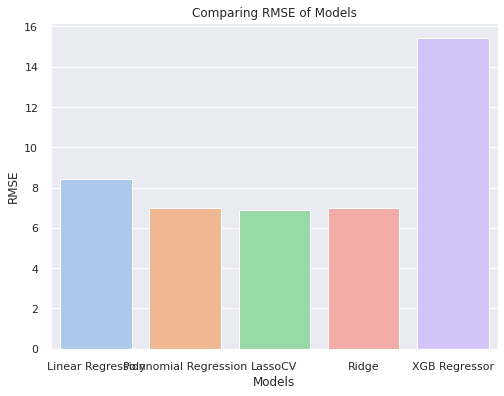

In [108]:
sns.set()
plt.figure(figsize=(8,6))
models = ['Linear Regression','Polynomial Regression',   'LassoCV' , "Ridge" , "XGB Regressor"]
rmse = [LinearModel.iloc[2]["Metrics"], PolyModel.iloc[2]["Metrics"], LassoModel.iloc[2]["Metrics"], RidgeModel.iloc[2]["Metrics"], XGBModel.iloc[2]["Metrics"]]
ax = sns.barplot(x = models, y = rmse, palette = 'pastel')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models');

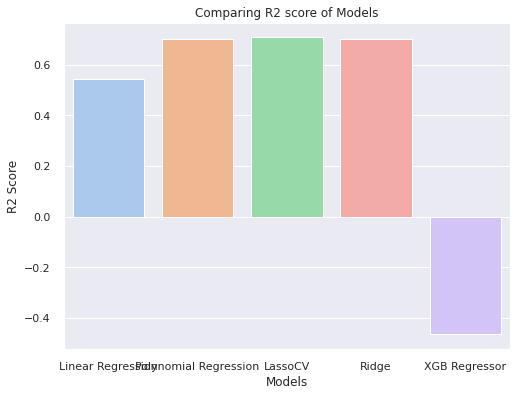

In [114]:
sns.set()
plt.figure(figsize=(8,6))
models = ['Linear Regression','Polynomial Regression',   'LassoCV' , "Ridge" , "XGB Regressor"]
r2score = [LinearModel.iloc[4]["Metrics"], PolyModel.iloc[4]["Metrics"], LassoModel.iloc[4]["Metrics"], RidgeModel.iloc[4]["Metrics"], XGBModel.iloc[0]["Metrics"]]
ax = sns.barplot(x = models, y = r2score, palette = 'pastel')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 score of Models');

# Final Conclusion :
We can see that the Lasso Model, Polynomial Model and Ridge Model performs the best overall with respect ot RMSE and Accuracy and very simillar

~Accuracy: 0.70

~RMSE: 6.8
